In [1]:
using Pkg
Pkg.activate("D:\\Science\\Code\\Julia\\envr")

  Activating project at `D:\Science\Code\Julia\envr`


In [1]:
using JLD, CairoMakie

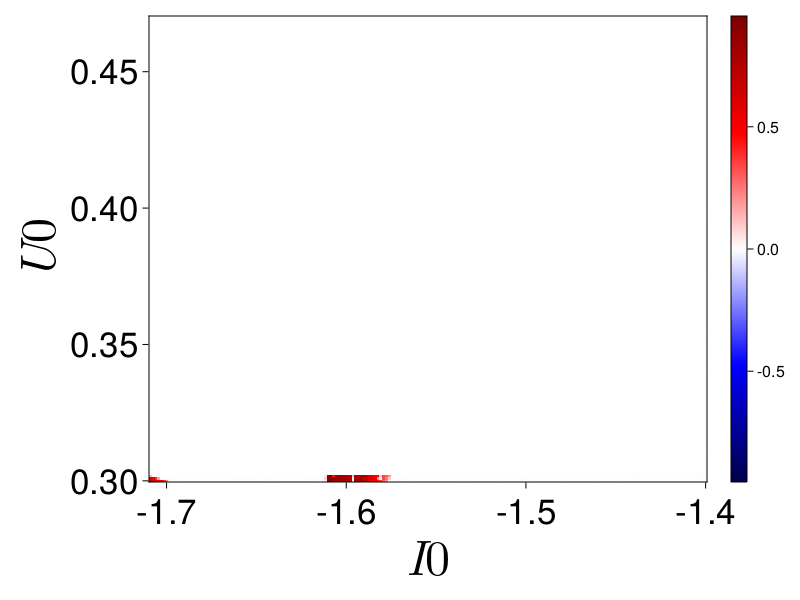

In [22]:
I0range = range( -1.40, -1.709, length = 201 )
U0range = range( 0.3,  0.47, length = 201)
idx_output = 1
Λs = load("LSs_200x200.jld")["data"]
absmax = maximum(abs.(Λs[:, :, idx_output]))
mn, mx =  -absmax, absmax

f = Figure()
ax1 = Axis(f[1, 1], xlabel = L"I0",ylabel = L"U0", xlabelsize = 50, ylabelsize = 50,
            xticklabelsize = 35, yticklabelsize = 35,
            xgridvisible  = false, ygridvisible = false)

hm = heatmap!(ax1, I0range, U0range, Λs[:, :, idx_output], colormap = :seismic, colorrange = (mn, mx))
Colorbar(f[1, 2], hm)
f

In [ ]:
@btime for (idx_U0, U0) in enumerate(U0range)
    for (idx_I0, I0) in enumerate(I0range)
    end
end
# 1.840 ms (81406 allocations: 3.11 MiB)

In [28]:
Threads.@threads for (idx_U0, U0) in enumerate(U0range)
    for (idx_I0, I0) in enumerate(I0range)
    end
end

LoadError: TaskFailedException

[91m    nested task error: [39mMethodError: no method matching firstindex(::Base.Iterators.Enumerate{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}})
    [0mClosest candidates are:
    [0m  firstindex(::Any, [91m::Any[39m) at abstractarray.jl:402
    [0m  firstindex([91m::Union{Tables.AbstractColumns, Tables.AbstractRow}[39m) at C:\Users\Alex\.julia\packages\Tables\T7rHm\src\Tables.jl:182
    [0m  firstindex([91m::Tuple[39m) at tuple.jl:25
    [0m  ...
    Stacktrace:
     [1] [0m[1m#71#threadsfor_fun#1[22m
    [90m   @ [39m[90m.\[39m[90m[4mthreadingconstructs.jl:69[24m[39m[90m [inlined][39m
     [2] [0m[1m#71#threadsfor_fun[22m
    [90m   @ [39m[90m.\[39m[90m[4mthreadingconstructs.jl:51[24m[39m[90m [inlined][39m
     [3] [0m[1m(::Base.Threads.var"#1#2"{var"#71#threadsfor_fun#2"{var"#71#threadsfor_fun#1#3"{Base.Iterators.Enumerate{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}}}, Int64})[22m[0m[1m([22m[0m[1m)[22m
    [90m   @ [39m[90mBase.Threads[39m [90m.\[39m[90m[4mthreadingconstructs.jl:30[24m[39m

In [ ]:
@btime for (idx_U0, U0) in enumerate(U0range)
    for (idx_I0, I0) in enumerate(I0range)
        println();flush(stdout)
    end
end
# 103.086 s (4336984 allocations: 335.32 MiB)